In [1]:
import pandas as pd
import numpy as np
import os
import librosa, librosa.display
import matplotlib.pyplot as plt

In [11]:
selected_tones = ["mā", "má", "mǎ", "mà"]

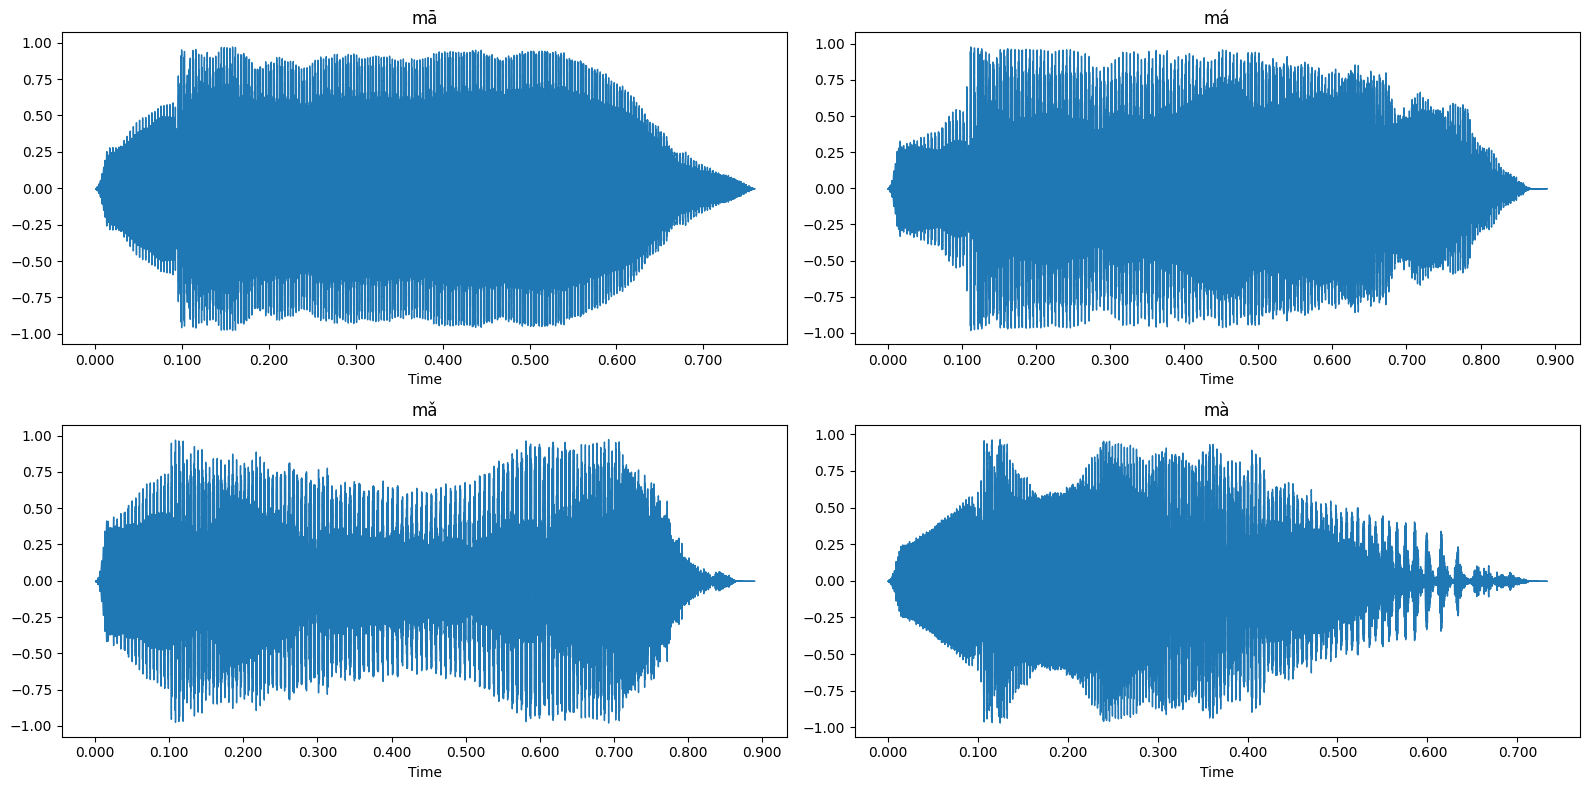

In [19]:
def show_wave(path, ax, title=""):
    audio, sr = librosa.load(path, sr=None)
    librosa.display.waveshow(audio, sr=sr, ax=ax)
    ax.set_title(title)

fig, axes = plt.subplots(2, 2, figsize=(16, 8))

for i in range(4):
    show_wave(f"examples/ma{i+1}.wav", axes[i // 2][ i % 2], title=selected_tones[i])

plt.tight_layout()
plt.show()

C:\Users\jedno\AppData\Local\Temp\ipykernel_13808\3159852988.py:5: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(D, sr=sr, x_axis="time", y_axis="log", cmap="viridis", ax=ax)


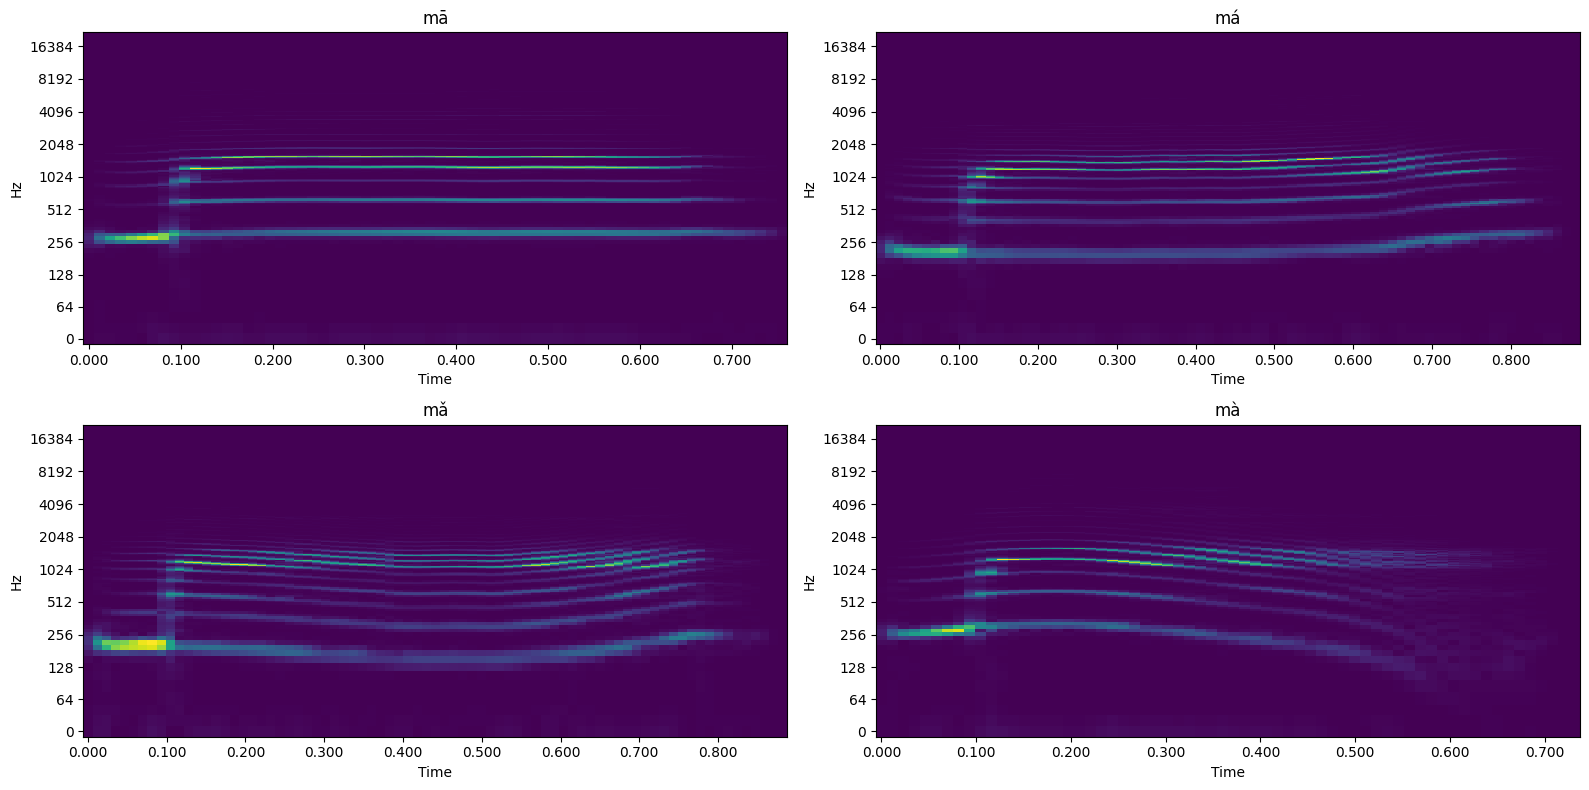

In [25]:
def show_spectrogram(path, ax, title=""):
    audio, sr = librosa.load(path, sr=None)

    D = librosa.stft(audio)
    librosa.display.specshow(D, sr=sr, x_axis="time", y_axis="log", cmap="viridis", ax=ax)

    ax.set_title(title)

fig, axes = plt.subplots(2, 2, figsize=(16, 8))

for i in range(4):
    show_spectrogram(f"examples/ma{i+1}.wav", axes[i // 2][ i % 2], title=selected_tones[i])

plt.tight_layout()
plt.show()